
---

# 🧠 Stochastic vs Batch vs Mini-Batch Gradient Descent

*(In the most delicious, understandable way ever)*

---

## 🍪 Let’s Use a Cookie Baking Analogy

Imagine you run a cookie shop 🍪 and you're teaching a robot chef 🤖 to bake perfect cookies by **tasting and improving the recipe** every time.

Now you have 100 customers who each say how the cookie tastes.

---

## 🍽️ 1. **Batch Gradient Descent** (🍽️ All-at-once Eating)

> **“Eat all 100 cookies first, then make changes to the recipe.”**

* 🍪 Robot waits until **all customers** give feedback.
* Then it **updates the recipe** once based on the **average opinion**.

### ✅ Pros:

* Very accurate
* Stable learning

### ❌ Cons:

* Very slow
* Needs a lot of memory

### 🧠 Real-Life Use:

* Works well when you have **a small dataset**
* Great for training on powerful computers

---

## 🧃 2. **Stochastic Gradient Descent (SGD)** (🥄 One-bite-at-a-time Eating)

> **“Taste just ONE cookie, then change the recipe a little.”**

* 🤖 Robot takes feedback from **just 1 customer at a time**
* Changes recipe after **every single opinion**

### ✅ Pros:

* Super fast updates
* Starts learning immediately
* Great for **online learning** (streaming data)

### ❌ Cons:

* Jumpy & noisy (recipe changes too often)
* Can bounce around and never settle

### 🧠 Real-Life Use:

* When data is huge and needs to learn quickly
* Good for real-time or streaming data

---

## 🧺 3. **Mini-Batch Gradient Descent** (🍱 Best of Both Worlds)

> **“Taste 10 cookies at a time, then update the recipe.”**

* 🤖 Robot listens to **a few customers** (e.g., 10 or 32)
* Changes recipe based on **that mini-group**

### ✅ Pros:

* Fast AND stable
* Commonly used in real-world training
* Works well with GPUs (parallel processing)

### ❌ Cons:

* Still requires tuning the batch size
* Not as exact as full batch, but close enough

### 🧠 Real-Life Use:

* Most deep learning models use **mini-batches** (e.g., batch size 32, 64, 128)
* Fast training with good accuracy

---

## 📊 Summary Table

| Type                 | Update Frequency          | Speed    | Stability      | Memory Use | Typical Use Case              |
| -------------------- | ------------------------- | -------- | -------------- | ---------- | ----------------------------- |
| **Batch**            | Once per epoch (all data) | 🐢 Slow  | 😇 Very Stable | 🧠 High    | Small datasets, exact updates |
| **Stochastic (SGD)** | After every data point    | 🚀 Fast  | 😵 Noisy       | 🧠 Low     | Huge/streaming data           |
| **Mini-Batch**       | Every *k* data points     | 🏎️ Fast | 🤝 Balanced    | 🧠 Medium  | Almost all deep learning work |

---

## 🎯 TL;DR — Baby Recap

> 🧠 The difference is **how much data** you use **before updating** your brain (weights):

* **Batch**: “Wait for EVERYONE to speak, then act.”
* **SGD**: “Change your mind after EVERY person.”
* **Mini-Batch**: “Listen to a SMALL group, then update.” ✅ ✅ ✅

---


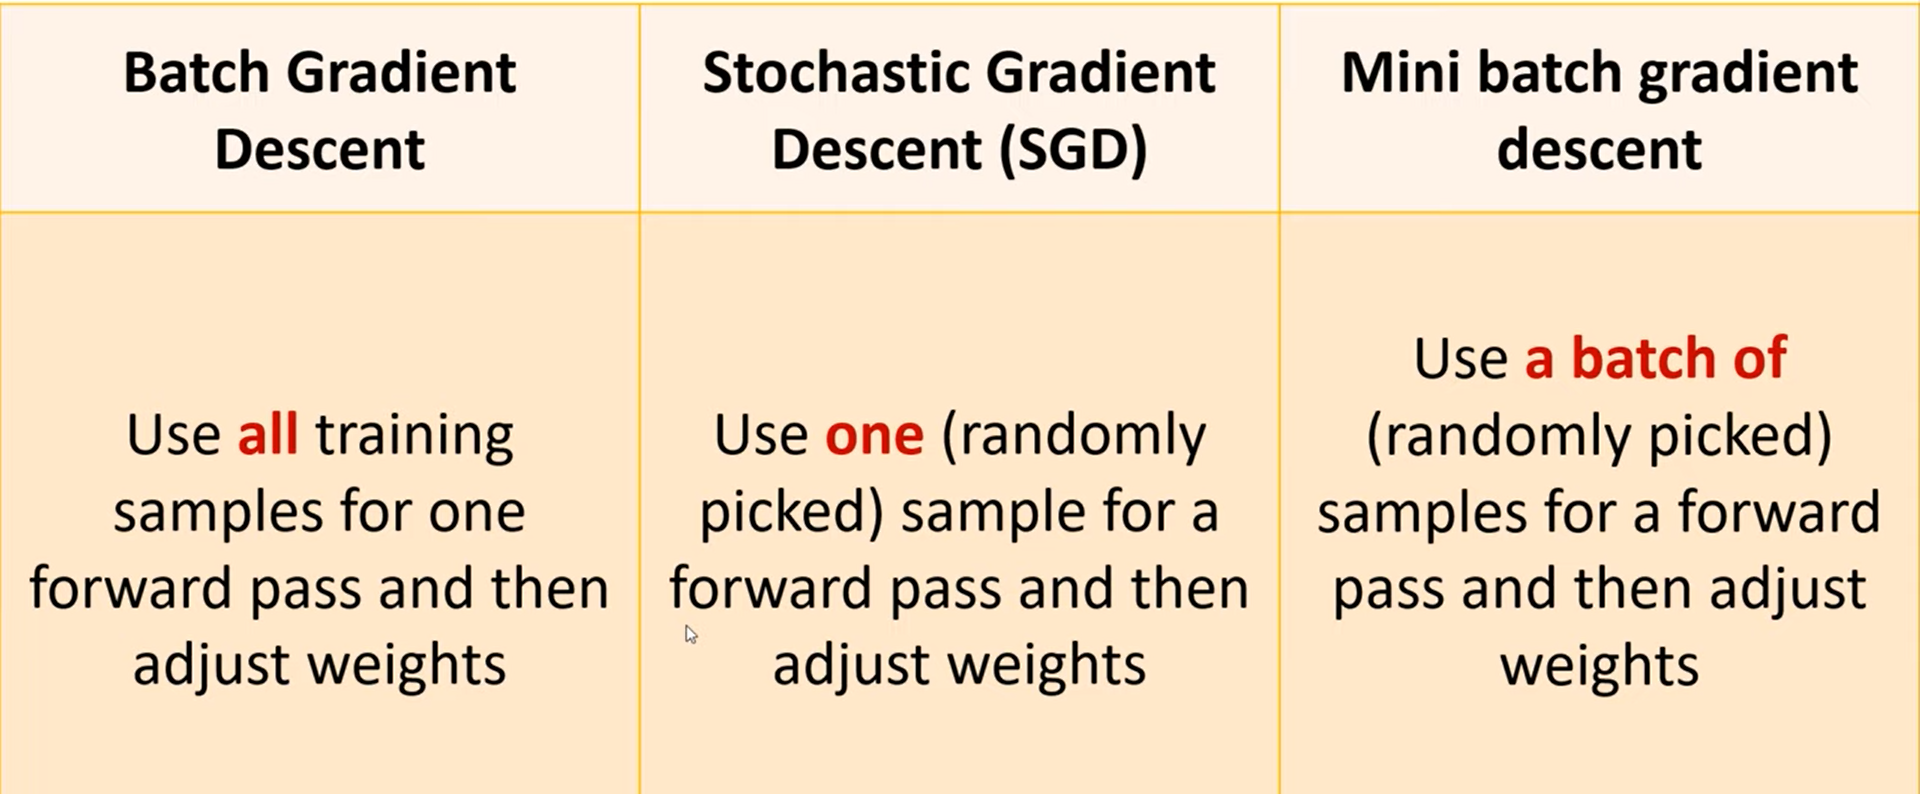

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("../../Datasets/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [2]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [3]:
scaled_X = sx.fit_transform(df.drop("price",axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
np.ones(shape=(2))

array([1., 1.])

In [ ]:
def batch_gradient_descent(X,y,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w,scaled_X.T) + b

        w_grad = -(2/total_samples) * (X.T.dot(y - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y- y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}: w = {w}, b = {b}, cost = {cost}")

    return w,b,cost,cost_list,epoch_list

In [12]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0]),epochs=1000,learning_rate=0.01)


Epoch 0: w = [0.99551317 0.99445655], b = -0.009603223499361428, cost = 0.2768777174681
Epoch 10: w = [0.95630831 0.94626642], b = -0.09163530752945695, cost = 0.16573507027671064
Epoch 20: w = [0.92561534 0.90895369], b = -0.1526797697123304, cost = 0.10212908135956808
Epoch 30: w = [0.9013738  0.87987065], b = -0.19789162051248474, cost = 0.06564235879682481
Epoch 40: w = [0.88202714 0.8570175 ], b = -0.23116355287977375, cost = 0.04463022365578522
Epoch 50: w = [0.86639945 0.8388837 ], b = -0.2554349736249456, cost = 0.03245122421764872
Epoch 60: w = [0.85360224 0.82432823], b = -0.27292538144121864, cost = 0.025317339083010492
Epoch 70: w = [0.8429641  0.81248913], b = -0.2853106120900698, cost = 0.021067914076635823
Epoch 80: w = [0.83397757 0.80271516], b = -0.2938559373058315, cost = 0.01847041893523527
Epoch 90: w = [0.826259   0.79451428], b = -0.2995165799588363, cost = 0.016821657535428185
Epoch 100: w = [0.81951826 0.78751463], b = -0.30301362222683875, cost = 0.01572033146

In [13]:
w,b,cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

In [14]:
epoch_list , cost_list

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490,
  500,
  510,
  520,
  530,
  540,
  550,
  560,
  570,
  580,
  590,
  600,
  610,
  620,
  630,
  640,
  650,
  660,
  670,
  680,
  690,
  700,
  710,
  720,
  730,
  740,
  750,
  760,
  770,
  780,
  790,
  800,
  810,
  820,
  830,
  840,
  850,
  860,
  870,
  880,
  890,
  900,
  910,
  920,
  930,
  940,
  950,
  960,
  970,
  980,
  990],
 [0.2768777174681,
  0.16573507027671064,
  0.10212908135956808,
  0.06564235879682481,
  0.04463022365578522,
  0.03245122421764872,
  0.025317339083010492,
  0.021067914076635823,
  0.01847041893523527,
  0.016821657535428185,
  0.015720331469182485,
  0.014937329116527901,
  0.014341749105819087,
  0.01385

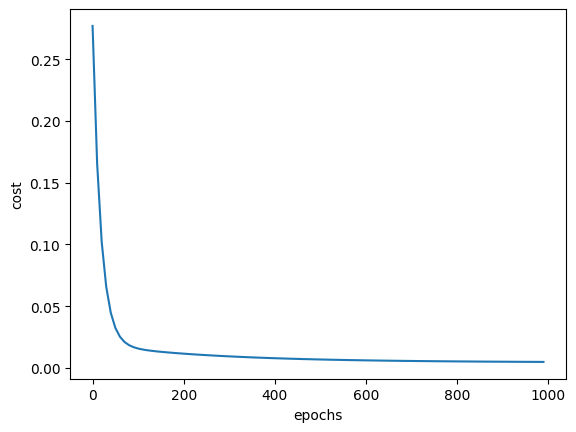

In [15]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


In [17]:
sx.transform([[2600,4]]) # Its scalling down between 0 and 1

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [19]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0] # This is a two dimensional array and we need the first so [0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]]) # It will inverse the transformation i.e it will convert to real number from scaled numbers

predict(2600,4,w,b)


c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[124.9756119]])

See here 124 means 124 lakhs which is 1.24 Cr

# Stochastic Gradient Descent

In [ ]:
import random
import numpy as np

def stochastic_gradient_descent(X, y, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, X.shape[0] - 1)
        sample_x = X[random_index]
        sample_y = y[random_index]

        y_predicted = np.dot(w, sample_x) + b

        # Gradients using single sample
        w_grad = -2 * sample_x * (sample_y - y_predicted)
        b_grad = -2 * (sample_y - y_predicted)

        # Update weights
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = (sample_y - y_predicted) ** 2  # Cost from single sample

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}: w = {w}, b = {b}, cost = {cost}")

    return w, b, cost, cost_list, epoch_list


In [27]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0]),epochs=1000,learning_rate=0.01)


Epoch 0: w = [0.99779987 0.99501533], b = -0.009969348659003832, cost = 0.24846978171195375
Epoch 100: w = [0.8158317  0.78082387], b = -0.3220331090261051, cost = 0.011610380208917869
Epoch 200: w = [0.77633434 0.74618903], b = -0.28676116200232826, cost = 0.0021729144276056503
Epoch 300: w = [0.7486765  0.72022257], b = -0.25943306927357407, cost = 0.005441053842602212
Epoch 400: w = [0.71799065 0.68775808], b = -0.23825717008296818, cost = 0.0022974641669282164
Epoch 500: w = [0.69886661 0.66379927], b = -0.2304558128480506, cost = 0.0027665145550287177
Epoch 600: w = [0.69041194 0.65102048], b = -0.20350955390486394, cost = 0.00868982627830852
Epoch 700: w = [0.67293245 0.62986693], b = -0.19723473510100809, cost = 0.00044971835598433293
Epoch 800: w = [0.668526   0.61887063], b = -0.1850335168122838, cost = 0.0029233878491253962
Epoch 900: w = [0.66258401 0.60906613], b = -0.18519199399858177, cost = 0.011072698884452399


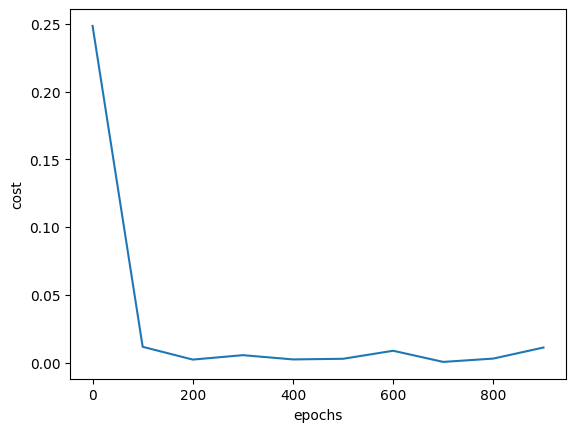

In [28]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)


In [29]:

predict(2600,4,w_sgd,b_sgd)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[122.87996868]])

<center><h1 style="color:red;">Excersize</h1></center>
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD.
In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For
example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust
weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after
every m samples (where m is batch size and it is 0 <m< n, where n is total number of samples

In [38]:

def mini_batch_gradient_descent(X, y, epochs, learning_rate=0.01, batch_size=5):
    num_samples = X.shape[0]
    num_features = X.shape[1]

    w = np.ones(shape=(num_features))
    b = 0

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Predictions for the batch
            y_predicted = np.dot(X_batch, w) + b

            # Gradients for the batch
            w_grad = -2 * np.dot(X_batch.T, (y_batch - y_predicted)) / X_batch.shape[0]
            b_grad = -2 * np.sum(y_batch - y_predicted) / X_batch.shape[0]

            # Update weights and bias
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

        # Compute loss over the full dataset after each epoch
        y_full_pred = np.dot(X, w) + b
        cost = np.mean((y - y_full_pred) ** 2)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch {i}: w = {w}, b = {b}, cost = {cost}")

    return w, b, cost, cost_list, epoch_list


In [39]:
w_mbgd,b_mbgd,cost_mbgd,cost_list_mbgd,epoch_list_mbgd = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0]),epochs=1000,learning_rate=0.01)


Epoch 0: w = [0.98271404 0.9786293 ], b = -0.036745835358709206, cost = 0.22489041446938138
Epoch 100: w = [0.72390488 0.69359124], b = -0.24676526846813984, cost = 0.00781978471059205
Epoch 200: w = [0.67421576 0.62744558], b = -0.19307472011453164, cost = 0.005282896734607993
Epoch 300: w = [0.66046295 0.58613215], b = -0.1663817673700087, cost = 0.0046093524698342945
Epoch 400: w = [0.66248647 0.55668598], b = -0.15218519990188079, cost = 0.004337063051202982
Epoch 500: w = [0.67132743 0.5333452 ], b = -0.14361818113583286, cost = 0.004162202144225827
Epoch 600: w = [0.68278864 0.51329497], b = -0.1377298407247344, cost = 0.004020250511529487
Epoch 700: w = [0.69493267 0.49515122], b = -0.13342570029823078, cost = 0.003896577357155514
Epoch 800: w = [0.70710184 0.47850382], b = -0.12968551309220006, cost = 0.003786922845724483
Epoch 900: w = [0.71885327 0.46292716], b = -0.12644775894516988, cost = 0.0036892644061083738


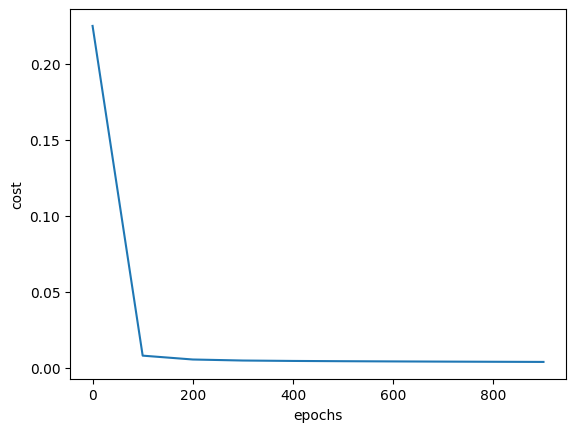

In [40]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [41]:
predict(2600,4,w_mbgd,b_mbgd)

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.92628702]])